# How does weather affect the amount of people using the station? #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

%matplotlib inline

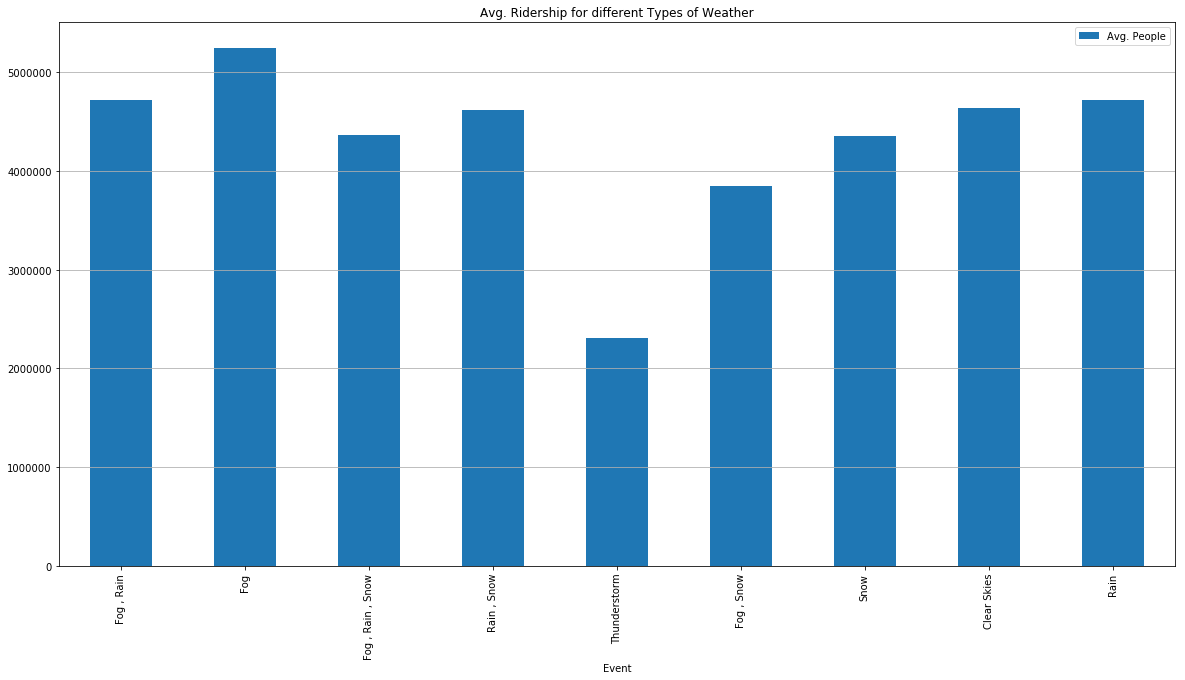

In [2]:
with open('output/weather-overall.txt') as f:
    overall = f.read()
overall = ast.literal_eval(overall)
overall

# convert to dataframe
dfOverall = pd.DataFrame(overall)
dfOverall.columns = ['Event','Avg. People']
dfOverall.plot(x='Event', y='Avg. People', kind='bar', figsize=(20,10), title='Avg. Ridership for different Types of Weather') \
        .yaxis.grid(True)

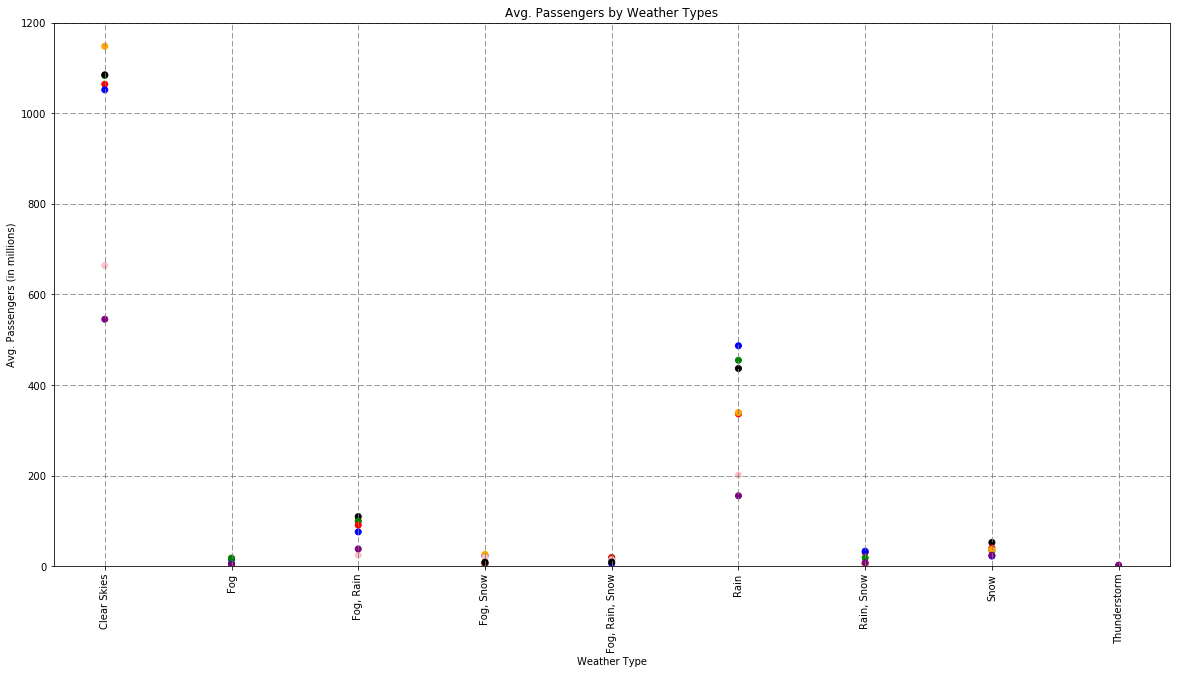

In [3]:
with open('output/weather-dayweek.txt') as f:
    dayweek = f.read()
dayweek = ast.literal_eval(dayweek)

# flatten first
# convert to dataframe
flatList = []
for items in dayweek:
    flatList.append((items[0][0], items[0][1], items[1]))
dfDayweek = pd.DataFrame(flatList)
dfDayweek.columns = ['Dayweek', 'Event','AvgPeople']
dfDayweek['AvgPeople'] = dfDayweek['AvgPeople']/1000000
(listDayweek, listEvent, listAvg) = (dfDayweek.Dayweek.tolist(), \
                                     dfDayweek.Event.tolist(), \
                                     dfDayweek.AvgPeople.tolist())
listEventTags = []
for values in listEvent:
    if values == 'Clear Skies':
        listEventTags.append(1)
    if values == 'Fog':
        listEventTags.append(2)
    if values == 'Fog , Rain':
        listEventTags.append(3)
    if values == 'Fog , Snow':
        listEventTags.append(4)
    if values == 'Fog , Rain , Snow':
        listEventTags.append(5)
    if values == 'Rain':
        listEventTags.append(6)
    if values == 'Rain , Snow':
        listEventTags.append(7)
    if values == 'Snow':
        listEventTags.append(8)
    if values == 'Thunderstorm':
        listEventTags.append(9)

df = pd.DataFrame(dict(event=listEventTags, people=listAvg, color=listDayweek))
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim([0, 1200])
colors = {'Monday':'red', 'Tuesday':'blue', 'Wednesday':'green', 'Thursday':'black', 'Friday': 'orange', 'Saturday': 'pink', 'Sunday': 'purple'}
ax.scatter(df['event'], df['people'], c=df['color'].apply(lambda x: colors[x]))
renamed = ['', 'Clear Skies','Fog','Fog, Rain','Fog, Snow', 'Fog, Rain, Snow', 'Rain', 'Rain, Snow', 'Snow', 'Thunderstorm']
ax.set_xticklabels(renamed, rotation='vertical')
ax.grid(color='gray',linestyle='--')
ax.set_xlabel('Weather Type')
ax.set_ylabel('Avg. Passengers (in millions)')
ax.set_title('Avg. Passengers by Weather Types')
plt.show()
